# Introduction

This project aims to determine the best neighborhood in Pittsburgh based on educational indicators. Our approach involves analyzing school enrollment data from the Pittsburgh American Community Survey 2015. We will develop a metric to evaluate each neighborhood's educational opportunities and access to schooling.

# The Metric

Our metric will focus on the percentage of individuals enrolled in various levels of schooling within each neighborhood. We will measure features such as enrollment in nursery school, kindergarten, elementary school, high school, college undergraduate years, and graduate or professional school. By analyzing these features, we can assess the educational landscape of each neighborhood.

# Data Description

The data was extracted from the Pittsburgh American Community Survey 2015, School Enrollment, All races.

[Link to the dataset](https://data.wprdc.org/dataset/3cb2b9c2-66e2-4ffa-b0a1-35fb2c6f7230/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f/download/school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over.csv)


## Appropriate Indexes for Data Analysis

To evaluate the best neighborhood based on education, we can analyze the following indexes:

1. **Enrollment Rate**: The percentage of individuals enrolled in school compared to the total population.

2. **Not Enrolled Rate**: The percentage of individuals not enrolled in school compared to the total population.

3. **Kindergarten Enrollment Rate (grade 1 to 12)**: The percentage of individuals enrolled in kindergarten compared to the total population.

4. **Undergraudate Rate**: The percentage of individuals enrolled in college or undergraduate programs compared to the total population.

5. **Graduate Enrollment Rate**: The percentage of individuals enrolled in graduate or professional school compared to the total population.



## Choice of Index for Data Analysis

These indexes provide insights into different aspects of education within each neighborhood, such as early childhood education, primary education, higher education, and overall enrollment status.


To evaluate the best neighborhood based on education, the percentage of individuals enrolled in higher education institutions (college, undergraduate, graduate, or professional school) is chosen as the primary index for data analysis. Here's why this index is the best choice:

1. **Reflects Educational Attainment**: Enrollment in higher education institutions indicates individuals' pursuit of advanced learning beyond high school. It reflects the educational attainment level of the population, which is a key indicator of a neighborhood's educational quality and opportunities.

2. **Long-Term Impact**: Higher education is associated with better career prospects, higher income potential, and overall socio-economic advancement. Analyzing enrollment in higher education institutions provides insights into the long-term socio-economic development potential of each neighborhood.

3. **Accessibility and Equity**: Analyzing enrollment in higher education institutions allows us to assess the accessibility and equity of higher education opportunities within each neighborhood. Disparities in enrollment rates may indicate unequal access to educational resources and opportunities, highlighting areas for intervention and improvement.


In [30]:
import pandas as pd

# Load the dataset
data_enrollment = "school_enrollment.csv"
school_enrollment_data = pd.read_csv(data_enrollment)
data_population = "population.csv"
population_data = pd.read_csv(data_population)

# Rename
# Define a dictionary mapping old column names to new column names
column_rename_enroll = {
    "Estimate; Total:": "total enrollment",
    "Estimate; Not enrolled in school": "not enrolled",
    "Estimate; Enrolled in school: - Enrolled in kindergarten": "total enrolled in kindergarten",
    "Estimate; Enrolled in school: - Enrolled in grade 1": "grade 1",
    "Estimate; Enrolled in school: - Enrolled in grade 2": "grade 2",
    "Estimate; Enrolled in school: - Enrolled in grade 3": "grade 3",
    "Estimate; Enrolled in school: - Enrolled in grade 4": "grade 4",
    "Estimate; Enrolled in school: - Enrolled in grade 5": "grade 5",
    "Estimate; Enrolled in school: - Enrolled in grade 6": "grade 6",
    "Estimate; Enrolled in school: - Enrolled in grade 7": "grade 7",
    "Estimate; Enrolled in school: - Enrolled in grade 8": "grade 8",
    "Estimate; Enrolled in school: - Enrolled in grade 9": "grade 9",
    "Estimate; Enrolled in school: - Enrolled in grade 10": "grade 10",
    "Estimate; Enrolled in school: - Enrolled in grade 11": "grade 11",
    "Estimate; Enrolled in school: - Enrolled in grade 12": "grade 12",
    "Estimate; Enrolled in school: - Enrolled in college, undergradu": "undergraduate",
    "Estimate; Enrolled in school: - Graduate or professional school": "graduate"
}

school_enrollment_data.rename(columns=column_rename_enroll, inplace=True)

population_data['total population'] = population_data['Estimate; Total'] + population_data['Margin of Error; Total']

# Merge the two dataframes on the "Neighborhood" column
neigh_enroll_population = pd.merge(school_enrollment_data, population_data, on="Neighborhood", how="inner")

# Display the merged dataframe
print(neigh_enroll_population)

    _id_x         Neighborhood  Id_x  total enrollment  \
0       1     Allegheny Center     1            1389.0   
1       2       Allegheny West     2             343.0   
2       3            Allentown     3            2520.0   
3       4            Arlington     4            1823.0   
4       5    Arlington Heights     5             213.0   
..    ...                  ...   ...               ...   
86     87  Upper Lawrenceville    87            2662.0   
87     88             West End    88             235.0   
88     89         West Oakland    89            1681.0   
89     90             Westwood    90            3303.0   
90     91              Windgap    91            1526.0   

    Margin of Error; Total:  Estimate; Enrolled in school:  \
0                193.000000                          394.0   
1                 96.000000                           61.0   
2                449.503059                          965.0   
3                342.302498                          42

In [31]:
# Calculate rate
neigh_enroll_population['enrollment rate'] = (neigh_enroll_population['total enrollment'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 1 rate'] = (neigh_enroll_population['grade 1'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 2 rate'] = (neigh_enroll_population['grade 2'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 3 rate'] = (neigh_enroll_population['grade 3'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 4 rate'] = (neigh_enroll_population['grade 4'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 5 rate'] = (neigh_enroll_population['grade 5'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 6 rate'] = (neigh_enroll_population['grade 6'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 7 rate'] = (neigh_enroll_population['grade 7'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 8 rate'] = (neigh_enroll_population['grade 8'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 9 rate'] = (neigh_enroll_population['grade 9'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 10 rate'] = (neigh_enroll_population['grade 10'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 11 rate'] = (neigh_enroll_population['grade 11'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['grade 12 rate'] = (neigh_enroll_population['grade 12'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['graduate rate'] = (neigh_enroll_population['graduate'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['undergraduate rate'] = (neigh_enroll_population['undergraduate'] / neigh_enroll_population['total population']) * 100
neigh_enroll_population['not enrolled rate'] = (neigh_enroll_population['not enrolled'] / neigh_enroll_population['total population']) * 100

enroll_rate = neigh_enroll_population[['Neighborhood', 'enrollment rate','not enrolled rate', 'grade 1 rate', 'grade 2 rate', 'grade 3 rate', 'grade 4 rate', 'grade 5 rate', 'grade 6 rate', 'grade 7 rate', 'grade 8 rate', 'grade 9 rate', 'grade 10 rate', 'grade 11 rate', 'grade 12 rate', 'graduate rate', 'undergraduate rate']]
print(enroll_rate)

           Neighborhood  enrollment rate  not enrolled rate  grade 1 rate  \
0      Allegheny Center        86.434350          61.916615      2.862477   
1        Allegheny West        78.132118          64.236902      3.644647   
2             Allentown        83.782911          51.699375      3.989662   
3             Arlington        82.856550          63.449119      0.227253   
4     Arlington Heights        53.517588          43.467337      0.000000   
..                  ...              ...                ...           ...   
86  Upper Lawrenceville        83.455899          63.861633      0.000000   
87             West End        63.002681          43.967828      0.000000   
88         West Oakland        83.965960          44.455505      1.098900   
89             Westwood        83.726600          67.782297      0.557670   
90              Windgap        80.238559          58.680362      1.261943   

    grade 2 rate  grade 3 rate  grade 4 rate  grade 5 rate  grade 6 rate  \

In [32]:
# Sort the DataFrame by enrollment rate in descending order
enroll_rate_sorted = enroll_rate.sort_values(by='enrollment rate', ascending=False)

# Iterate through each row in the sorted DataFrame
for index, row in enroll_rate_sorted.iterrows():
    # Print the neighborhood's name and its enrollment rate
    print(f"Neighborhood: {row['Neighborhood']}")
    print(f"Enrollment Rate: {row['enrollment rate']}")
    print()

Neighborhood: Bluff
Enrollment Rate: 94.00933345429104

Neighborhood: North Oakland
Enrollment Rate: 93.49847803162554

Neighborhood: Bloomfield
Enrollment Rate: 92.76939986452656

Neighborhood: Shadyside
Enrollment Rate: 92.13819949856054

Neighborhood: Squirrel Hill South
Enrollment Rate: 91.60325732703427

Neighborhood: Squirrel Hill North
Enrollment Rate: 91.47553159363542

Neighborhood: Mount Washington
Enrollment Rate: 91.11645828970018

Neighborhood: Point Breeze
Enrollment Rate: 90.7801108603471

Neighborhood: Brookline
Enrollment Rate: 90.59732622016942

Neighborhood: Central Lawrenceville
Enrollment Rate: 90.20187662649306

Neighborhood: Central Oakland
Enrollment Rate: 89.82604469336907

Neighborhood: Carrick
Enrollment Rate: 89.73695812717078

Neighborhood: South Side Slopes
Enrollment Rate: 89.67961748287486

Neighborhood: Lincoln-Lemington-Belmar
Enrollment Rate: 89.45725434888605

Neighborhood: Central Business District
Enrollment Rate: 89.35317816196142

Neighborhood: O

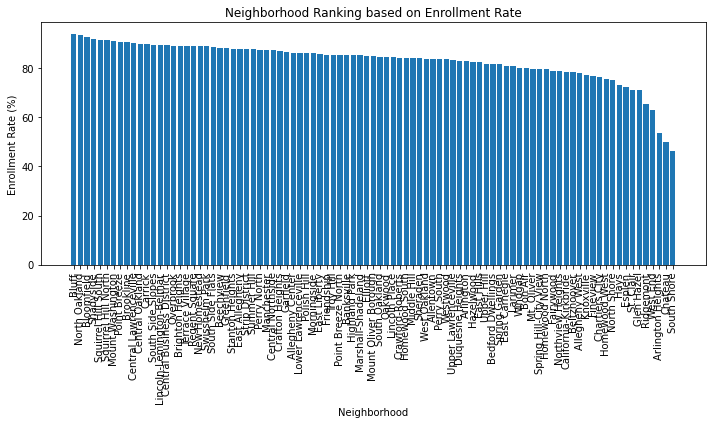

In [33]:
import matplotlib.pyplot as plt

# Sort the dataframe by enrollment rate
sorted_data_enrollment = enroll_rate.sort_values(by='enrollment rate', ascending=False)

# Plot the bar chart for enrollment rate
plt.figure(figsize=(10, 6))
plt.bar(sorted_data_enrollment['Neighborhood'], sorted_data_enrollment['enrollment rate'])
plt.title('Neighborhood Ranking based on Enrollment Rate')
plt.xlabel('Neighborhood')
plt.ylabel('Enrollment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [37]:
# Sort the dataset by enrollment rate in descending order
sorted_enroll_rate = enroll_rate.sort_values(by='enrollment rate', ascending=False)

# Choose the top 5 neighborhoods based on enrollment rate
top_5_enrollment_neighborhoods = sorted_enroll_rate.head(5)

# Print the resulting DataFrame
print(top_5_enrollment_neighborhoods)


           Neighborhood  enrollment rate  not enrolled rate  grade 1 rate  \
10                Bluff        94.009333          39.822049      0.000000   
56        North Oakland        93.498478          23.196225      0.332352   
9            Bloomfield        92.769400          68.916595      0.447581   
68            Shadyside        92.138199          59.595182      0.374376   
77  Squirrel Hill South        91.603257          64.783761      1.098530   

    grade 2 rate  grade 3 rate  grade 4 rate  grade 5 rate  grade 6 rate  \
10      0.000000      0.000000      0.000000      0.000000      0.000000   
56      0.000000      0.498528      0.175951      0.205276      0.000000   
9       0.196499      0.196499      0.382082      0.032750      0.305665   
68      0.117859      0.242651      0.166390      0.131725      0.055463   
77      0.761884      1.133967      0.744166      0.856381      0.584702   

    grade 7 rate  grade 8 rate  grade 9 rate  grade 10 rate  grade 11 rate  \
10

       Neighborhood  enrollment rate  not enrolled rate  grade 1 rate  \
1    Allegheny West            100.0          82.215743      4.664723   
19  Central Oakland            100.0          20.027482      0.103057   
20   Chartiers City            100.0          78.928571      2.321429   
21          Chateau            100.0         100.000000      0.000000   
25   East Allegheny            100.0          85.107399      0.000000   
30           Esplen            100.0          79.611650      0.000000   
57      North Shore            100.0          94.146341      0.000000   
71      South Shore            100.0          66.666667      0.000000   
87         West End            100.0          69.787234      0.000000   

    grade 2 rate  grade 3 rate  grade 4 rate  grade 5 rate  grade 6 rate  \
1       0.000000      0.000000      0.000000       0.00000           0.0   
19      0.000000      0.000000      0.000000       0.00000           0.0   
20      2.321429      4.285714      2.321

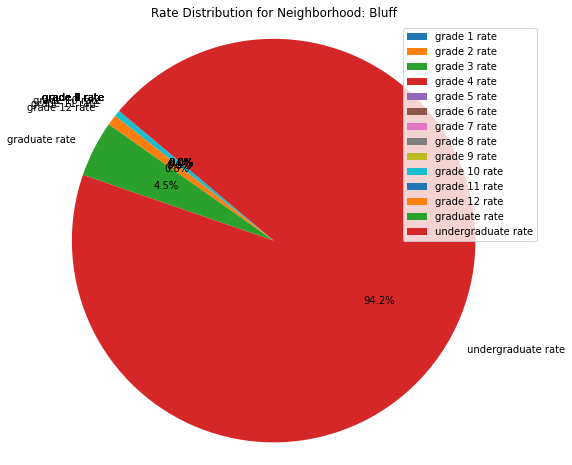

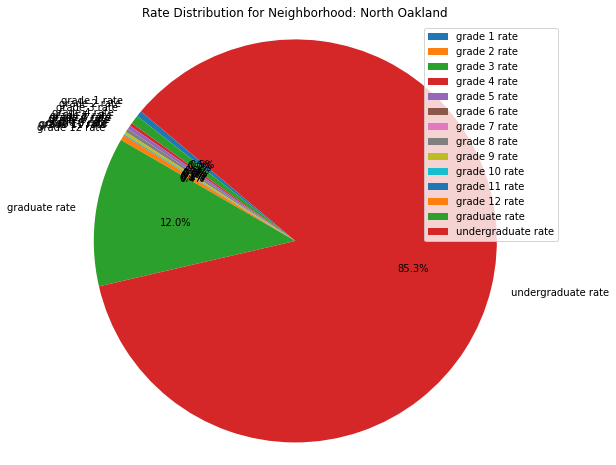

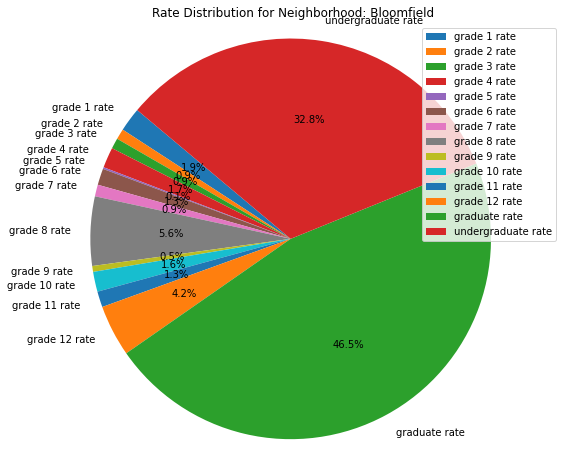

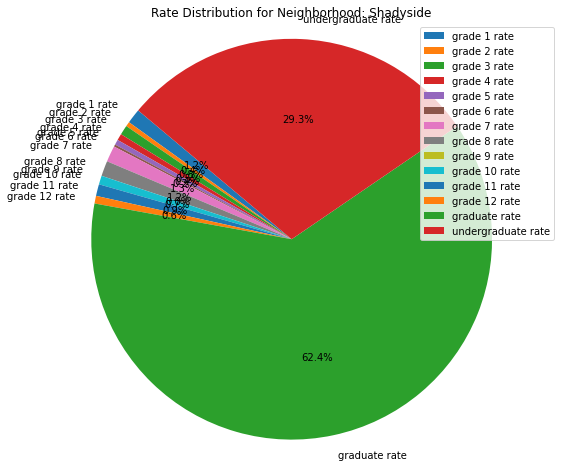

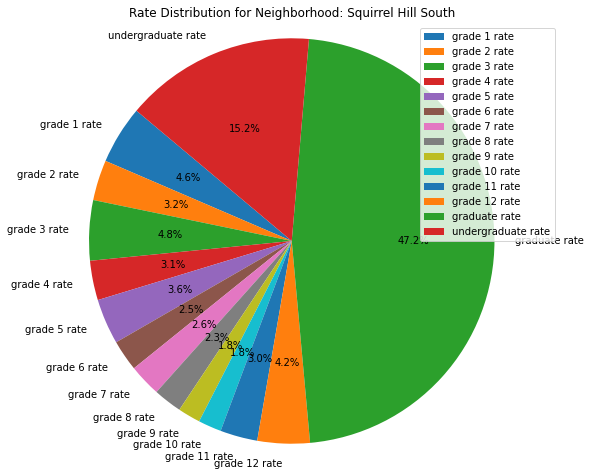

In [38]:
import matplotlib.pyplot as plt

# Iterate over each row in the DataFrame
for index, row in top_5_enrollment_neighborhoods.iterrows():
    # Get the neighborhood name
    neighborhood = row['Neighborhood']
    
    # Drop the 'Neighborhood', 'enrollment rate', and 'not enrolled rate' columns from the row
    columns_to_drop = ['Neighborhood', 'enrollment rate', 'not enrolled rate']
    row_data = row.drop(columns_to_drop)
    
    # Plot a pie chart for the row data
    plt.figure(figsize=(8, 8))
    plt.pie(row_data, labels=row_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Rate Distribution for Neighborhood: {neighborhood}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    
    plt.show()